## Data of Hessel's pulsar

This data consists of multiple seperate files, so we have to load them all in with their metadata.

In [15]:
import os
import sys
import glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
from utility.utility import short_list, elements_containing_string, contains_substring, slice_string_at_char, get_metadata_item
from utility.algorithm import peak_detect

def import_files(path, dtype):
    '''
    Import files in the syntax that I used in the notebook. That is, choose the path that contains
    all the files, then obtain all dat and inf files as dictionaries that can be accessed by filename. 
    '''

    filename = "*.dat"
    files =  [ p for p in Path(path).glob(filename) ]
    file_dict = dict()
    for file in files:
        with open(file, 'rb') as f:
            # key of the dict is the filename, value the data.
            file_dict[os.path.basename(file)] = np.fromfile(f, np.float32)

    metadata_dict = dict()
    filename = "*.inf"
    files =  [ p for p in Path(path).glob(filename) ]
    for file in files:
        with open(file) as f:
            metadata_dict[os.path.basename(file)] = f.readlines()

    return file_dict, metadata_dict 

In [16]:
data_dict, metadata_dict = import_files(path="../../LOFAR_2e_jaars_RP_2022_voor_studenten/Data_Pulsar2", dtype="float32")

In [17]:
print(short_list(data_dict['L83079_SAP0_BEAM0_DM39.66.dat']))
print(short_list(metadata_dict['L83079_SAP0_BEAM0_DM39.66.inf']))

43037.0,	43082.0,	...	,44427.1015625,	44427.1015625
 Data file name without suffix          =  L83079_SAP0_BEAM0_DM39.66
,	 Telescope used                         =  LOFAR
,	...	,
,	



In [18]:
metadata_dict['L83029_SAP0_BEAM0_DM39.66.inf']

[' Data file name without suffix          =  L83029_SAP0_BEAM0_DM39.66\n',
 ' Telescope used                         =  LOFAR\n',
 ' Instrument used                        =  HBA_110_190\n',
 ' Object being observed                  =  J1810+1715\n',
 ' J2000 Right Ascension (hh:mm:ss.ssss)  =  18:10:37.0000\n',
 ' J2000 Declination     (dd:mm:ss.ssss)  =  17:44:37.0000\n',
 ' Data observed by                       =  Unknown\n',
 ' Epoch of observation (MJD)             =  56299.364628335424641\n',
 ' Barycentered?           (1 yes, 0 no)  =  1\n',
 ' Number of bins in the time series      =  8800000    \n',
 ' Width of each time series bin (sec)    =  2.04799998755334e-05\n',
 ' Any breaks in the data? (1 yes, 0 no)  =  1\n',
 ' On/Off bin pair #  1                   =  0          , 8467354    \n',
 ' On/Off bin pair #  2                   =  8799999    , 8799999    \n',
 ' Type of observation (EM band)          =  Radio\n',
 ' Beam diameter (arcsec)                 =  0\n',
 ' Dispe

In [19]:
metadata_dict['L83061_SAP0_BEAM0_DM39.66.inf']

[' Data file name without suffix          =  L83061_SAP0_BEAM0_DM39.66\n',
 ' Telescope used                         =  LOFAR\n',
 ' Instrument used                        =  HBA_110_190\n',
 ' Object being observed                  =  J1810+1715\n',
 ' J2000 Right Ascension (hh:mm:ss.ssss)  =  18:10:37.0000\n',
 ' J2000 Declination     (dd:mm:ss.ssss)  =  17:44:37.0000\n',
 ' Data observed by                       =  Unknown\n',
 ' Epoch of observation (MJD)             =  56299.619493978832907\n',
 ' Barycentered?           (1 yes, 0 no)  =  1\n',
 ' Number of bins in the time series      =  8800000    \n',
 ' Width of each time series bin (sec)    =  2.04799998755334e-05\n',
 ' Any breaks in the data? (1 yes, 0 no)  =  1\n',
 ' On/Off bin pair #  1                   =  0          , 8467346    \n',
 ' On/Off bin pair #  2                   =  8799999    , 8799999    \n',
 ' Type of observation (EM band)          =  Radio\n',
 ' Beam diameter (arcsec)                 =  0\n',
 ' Dispe

In [20]:
nbins_dict = dict()
dt_dict = dict()
for key, val in metadata_dict.items():
    nbins_dict[key] = int(get_metadata_item(metadata_dict['L83061_SAP0_BEAM0_DM39.66.inf'], 'Number of bins in the time series'))
    dt_dict[key] = float(get_metadata_item(metadata_dict['L83061_SAP0_BEAM0_DM39.66.inf'], 'Width of each time series bin (sec)'))

In [21]:
nbins_dict.values()

dict_values([8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000, 8800000])

In [22]:
dt_dict.values()

dict_values([2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05, 2.04799998755334e-05])

In [23]:
dt = list(dt_dict.values())[0]
nbins = list(nbins_dict.values())[0]
print( dt )
print( nbins )

2.04799998755334e-05
8800000


In [24]:
total_time = nbins * dt
time = [t*dt for t in np.arange(0, nbins)]

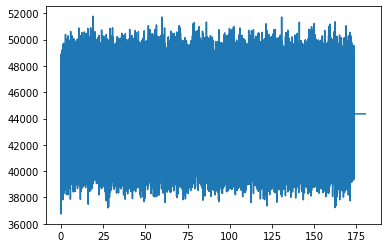

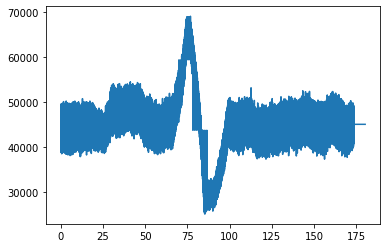

In [25]:
plt.plot(time, data_dict['L83029_SAP0_BEAM0_DM39.66.dat'])
plt.figure()
plt.plot(time, data_dict['L83061_SAP0_BEAM0_DM39.66.dat'])

In [26]:
#for val in data_dict.values():
#    plt.plot(time, val)
#    plt.figure()

In [27]:
#for val in data_dict.values():
#    frequencies  = np.fft.fftfreq(nbins, dt)
#    #transform = np.fft.fft(val) / len(val) # normalize the transform.
#    transform = np.fft.fft(val) / len(val) # normalize the transform.
#    plt.plot(frequencies[1:], abs(transform[1:]))
#    plt.xlim(0) # to remove the symmetry from the plot.
#    plt.figure()

In [28]:
frequencies  = np.fft.fftfreq(nbins, dt)[1:]
transform_abs = np.abs( np.fft.fft(data_dict['L83029_SAP0_BEAM0_DM39.66.dat']) / len(data_dict['L83029_SAP0_BEAM0_DM39.66.dat']) )[1:]

In [29]:
peak_indices = peak_detect(transform_abs, 10**2)
peak_heights = [transform_abs[i]  for i in peak_indices]

(0.0, 26855.463087130192)

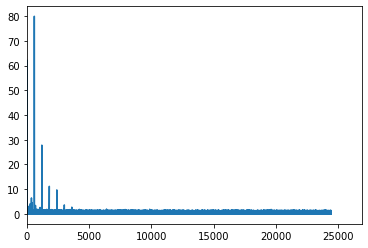

In [30]:
plt.plot(frequencies, transform_abs)
plt.xlim(0)

(0.0, 26855.463087130192)

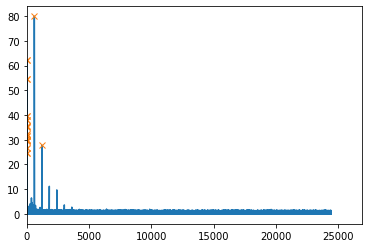

In [31]:
plt.plot(frequencies[1:], transform_abs[1:],'-', frequencies[peak_indices], peak_heights,'x')
plt.xlim(0)

In [32]:
frequencies  = np.fft.fftfreq(nbins, dt)[1:]
transform_abs = np.abs( np.fft.fft(data_dict['L83080_SAP0_BEAM0_DM39.66.dat']) / len(data_dict['L83080_SAP0_BEAM0_DM39.66.dat']) )[1:]
peak_indices = peak_detect(transform_abs, 10**2)
peak_heights = [transform_abs[i]  for i in peak_indices]

(0.0, 26855.463087130192)

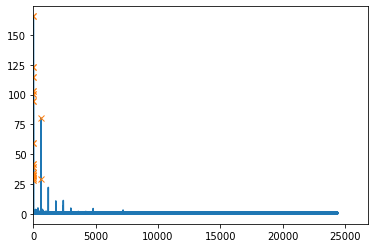

In [33]:
plt.plot(frequencies[1:], transform_abs[1:],'-', frequencies[peak_indices], peak_heights,'x')
plt.xlim(0)